<a href="https://colab.research.google.com/github/Amit-Padye/Natural-Langauge-Processing/blob/main/Text_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df=pd.read_csv('/content/drive/MyDrive/analytic/Tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df=df.loc[:,['airline_sentiment','text']]

In [5]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [6]:
df['text'][100]

'@VirginAmerica trying to add my boy Prince to my ressie. SF this Thursday @VirginAmerica from LAX http://t.co/GsB2J3c4gM'

In [7]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


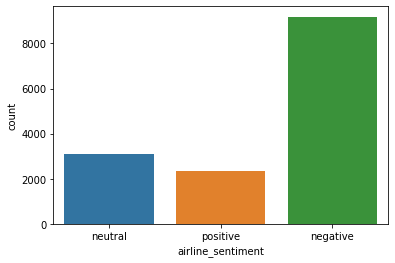

In [8]:
sns.countplot(df['airline_sentiment'])

In [9]:
df=df[df['airline_sentiment']!='neutral']

In [10]:
#for faster training
df=df.iloc[0:500,:].reset_index(drop=True)

In [11]:
df.head()

,airline_sentiment,text
0,positive,@VirginAmerica plus you've added commercials t...
1,negative,@VirginAmerica it's really aggressive to blast...
2,negative,@VirginAmerica and it's a really big bad thing...
3,negative,@VirginAmerica seriously would pay $30 a fligh...
4,positive,"@VirginAmerica yes, nearly every time I fly VX..."


##Preprocessing and Cleaning

###Lower case conversion

In [12]:
df['text']=df['text'].apply(lambda x:x.lower())

In [13]:
df.head(2)

,airline_sentiment,text
0,positive,@virginamerica plus you've added commercials t...
1,negative,@virginamerica it's really aggressive to blast...


###convert short form

I don't   to   i do not 

In [14]:
!pip install contractions

In [15]:
import contractions

In [16]:
df['text'][0]

"@virginamerica plus you've added commercials to the experience... tacky."

In [17]:
#you've conver to you have
contractions.fix(df['text'][0])

'@virginamerica plus you have added commercials to the experience... tacky.'

In [18]:
df['text']=df['text'].apply(lambda x:contractions.fix(x))

In [19]:
df.head(2)

,airline_sentiment,text
0,positive,@virginamerica plus you have added commercials...
1,negative,@virginamerica it is really aggressive to blas...


###Remove email from tweet

In [20]:
import re

In [21]:
tweet='my email are  amitpadye@gmail.com and amit@yahoo.com'

In [22]:
re.findall(r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)',tweet) # give list of email in tweet

['amitpadye@gmail.com', 'amit@yahoo.com']

In [23]:
df['text'].apply(lambda x:re.findall(r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)',x))

0      []
1      []
2      []
3      []
4      []
       ..
495    []
496    []
497    []
498    []
499    []
Name: text, Length: 500, dtype: object

In [24]:
tweet='my email are  amitpadye@gmail.com and amit@yahoo.com'

In [25]:
re.sub(r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)','',tweet)

'my email are   and '

In [26]:
df['text']=df['text'].apply(lambda x:re.sub(r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)','',x))

In [27]:
df.head(2)

,airline_sentiment,text
0,positive,@virginamerica plus you have added commercials...
1,negative,@virginamerica it is really aggressive to blas...


###Remove URLs from tweet

In [28]:
x='HII guys  https://machine_learning.com/nlp best website to learn nlp'

In [30]:
re.sub(r"http\S+",'', x)

'HII guys   best website to learn nlp'

In [32]:
df['text']=df['text'].apply(lambda x:re.sub(r"http\S+",'', x))

###Remove tag @

In [33]:
x='@amit padye'

In [34]:
re.sub(r"@\S+",'', x)

' padye'

In [35]:
df['text']=df['text'].apply(lambda x:re.sub(r"@\S+",'', x))

In [36]:
df.head(2)

,airline_sentiment,text
0,positive,plus you have added commercials to the experi...
1,negative,"it is really aggressive to blast obnoxious ""e..."


###Remove punctuations or special char

In [37]:
x='my name is: amit padye.... hi!!!!!! my email:amitpadye2307@gmail.com'

In [38]:
re.sub('[^A-Z a-z 0-9]+','',x)

'my name is amit padye hi my emailamitpadye2307gmailcom'

In [39]:
df['text']=df['text'].apply(lambda x:re.sub('[^A-Z a-z 0-9]+','',x))

In [40]:
df.head(2)

,airline_sentiment,text
0,positive,plus you have added commercials to the experi...
1,negative,it is really aggressive to blast obnoxious en...


In [41]:
df['text'][0]

' plus you have added commercials to the experience tacky'

###Remove multiple spaces

In [42]:
x='    my    name    is    amit     padye    '

In [43]:
" ".join(x.split())

'my name is amit padye'

In [44]:
df['text']=df['text'].apply(lambda x: " ".join(x.split()))

In [45]:
df.head(2)

,airline_sentiment,text
0,positive,plus you have added commercials to the experie...
1,negative,it is really aggressive to blast obnoxious ent...


###Remove HTML tags

In [46]:
from bs4 import BeautifulSoup

In [47]:
markup = '<a href="http://example.com/">\nI linked to <i>example.com</i>\n</a>'
BeautifulSoup(markup).get_text()


'\nI linked to example.com\n'

In [48]:
df['text']=df['text'].apply(lambda x:BeautifulSoup(x).get_text())

In [49]:
df.head(2)

,airline_sentiment,text
0,positive,plus you have added commercials to the experie...
1,negative,it is really aggressive to blast obnoxious ent...


In [50]:
pip install unidecode

In [51]:
import unidecode

In [52]:
x='orčpžsíáýd amit padye áýd '

In [53]:
unidecode.unidecode(x)

'orcpzsiayd amit padye ayd '

In [54]:
df['text']=df['text'].apply(lambda x:unidecode.unidecode(x))

In [55]:
df.head(2)

,airline_sentiment,text
0,positive,plus you have added commercials to the experie...
1,negative,it is really aggressive to blast obnoxious ent...


###Remove stop words

**NOTE**:Before removing stop words, research a bit about your task and the problem you are trying to solve, and then make your decision.

###Using **nltk**

In [56]:
import nltk
from nltk.corpus import stopwords


In [57]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
sw_nltk=stopwords.words('english')
print('There are :',len(sw_nltk) ,'stop words in nltk')

There are : 179 stop words in nltk


In [59]:
#Let's remove stop words
x='i am amit isisi is a then seemed'
' '.join([i for i in x.split() if i not in sw_nltk])

'amit isisi seemed'

In [60]:
df['text'][0]

'plus you have added commercials to the experience tacky'

In [61]:
df['text'].apply(lambda x:' '.join([i for i in x.split() if i not in sw_nltk]))[0]

'plus added commercials experience tacky'

####Using **spacy**

In [62]:
import spacy

In [63]:
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
print('There are :',len(sw_spacy) ,'stop words in nltk')


There are : 326 stop words in nltk


In [64]:
x='i am amit isisi is a then seemed'
' '.join([i for i in x.split() if i not in sw_spacy])

'amit isisi'

In [65]:
df['text'][0]

'plus you have added commercials to the experience tacky'

In [66]:
df['text'].apply(lambda x:' '.join([i for i in x.split() if i not in sw_nltk]))[0]

'plus added commercials experience tacky'

In [67]:
df['text']=df['text'].apply(lambda x:' '.join([i for i in x.split() if i not in sw_nltk]))

In [68]:
df.head(2)

,airline_sentiment,text
0,positive,plus added commercials experience tacky
1,negative,really aggressive blast obnoxious entertainmen...


###Converting words to root form



Stemming And Lemmatization

**NOTE**: Depends on application

In [69]:
!python -m spacy download en_core_web_md 

     |████████████████████████████████| 96.4 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [70]:
import spacy
nlp = spacy.load('en_core_web_md')

In [92]:
sentence ="Programmers uses programming languages to write computer programs"
doc = nlp(sentence)
for word in doc:
    print(doc)
    print(word.lemma_)


Programmers uses programming languages to write computer programs
programmer
Programmers uses programming languages to write computer programs
use
Programmers uses programming languages to write computer programs
program
Programmers uses programming languages to write computer programs
language
Programmers uses programming languages to write computer programs
to
Programmers uses programming languages to write computer programs
write
Programmers uses programming languages to write computer programs
computer
Programmers uses programming languages to write computer programs
program


In [83]:
doc = nlp(sentence)
l=list()
for word in doc:
    
    l.append(word.lemma_)

r=' '.join(l)    

In [86]:
def lemmatization_(sentence):
    doc = nlp(sentence)
    l=list()
    for word in doc:
        
        l.append(word.lemma_)

    return ' '.join(l) 

In [89]:
df['text'][0]

'plus added commercials experience tacky'

In [90]:
df['text']=df['text'].apply(lambda x:lemmatization_(x))

In [91]:
df.head(2)

,airline_sentiment,text
0,positive,plus added commercial experience tacky
1,negative,really aggressive blast obnoxious entertainmen...


###BY using **nltk**

In [93]:
from nltk.stem import WordNetLemmatizer

In [95]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [96]:
wnl = WordNetLemmatizer()
words =["programmer","programme","programs"]
for w in words: 
    print(w, " : ", wnl.lemmatize(w))

programmer  :  programmer
programme  :  programme
programs  :  program


###We can remove most frequently occuring words

In [97]:
' '.join(df['text'])

'plus added commercial experience tacky really aggressive blast obnoxious entertainment guest face amp little recourse really big bad thing seriously would pay 30 flight seat playingit really bad thing fly va yes nearly every time fly vx ear worm go away well notbut amazing arrive hour early good lt3 pretty graphic much well minimal iconography great deal already think 2nd trip amp even go 1st trip yet p -PRON- fly fabulous seductive sky take stress away travel thank sfopdx schedule still mia excited first cross country flight lax mco -PRON- hear nothing great thing virgin america 29daystogo fly nyc sfo last week could fully sit seat due two large gentleman either side help fly know would amazingly awesome bosfll please want fly first fare may three time carrier seat available select love graphic love hipster innovation feel good brand guy mess seating reserved seating friend guy give seat away want free internet status match program apply three week call email response happen 2 ur veg

In [100]:
words=' '.join(df['text']).split()
words_df=pd.Series(words)

In [101]:
words_df.head()

0          plus
1         added
2    commercial
3    experience
4         tacky
dtype: object

In [107]:
top5=words_df.value_counts()[0:5]
top5

flight    144
-PRON-     65
thank      52
get        50
fly        36
dtype: int64

you can remove most frequent and rare words 

In [ ]:
#code to remove most frequent words
#df['text'].apply(lambda x:" ".join([i for i in x.split() if i not in top5]))

simmilarly we can remove rare words

###word cloud visualization

In [109]:
from wordcloud import WordCloud

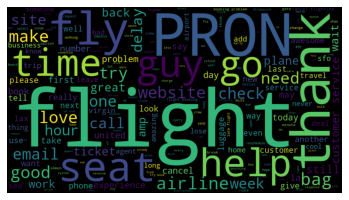

In [111]:
wc=WordCloud(width=900,height=500).generate(' '.join(df['text']))
plt.imshow(wc)
plt.axis('off')
plt.show()

####N-Grams

In [115]:
from nltk import ngrams

sentence = 'this is a foo bar sentences and i want to ngramize it'

n = 2
sixgrams = ngrams(sentence.split(), n)

for grams in sixgrams:
  print(grams)

('this', 'is')
('is', 'a')
('a', 'foo')
('foo', 'bar')
('bar', 'sentences')
('sentences', 'and')
('and', 'i')
('i', 'want')
('want', 'to')
('to', 'ngramize')
('ngramize', 'it')


###Bag of words

In [118]:
from sklearn.feature_extraction.text import CountVectorizer

In [123]:
x=['my name is amit amit','I love maths ', 'i am data scientist']

In [124]:
cv=CountVectorizer()
text_count=cv.fit_transform(x)

In [125]:
text_count

<3x9 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [126]:
text_count.toarray()

array([[0, 2, 0, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 1]])

In [127]:
cv.get_feature_names()

['am', 'amit', 'data', 'is', 'love', 'maths', 'my', 'name', 'scientist']

In [128]:
bag_of_words=pd.DataFrame(text_count.toarray(),columns=cv.get_feature_names())

In [129]:
bag_of_words

,am,amit,data,is,love,maths,my,name,scientist
0,0,2,0,1,0,0,1,1,0
1,0,0,0,0,1,1,0,0,0
2,1,0,1,0,0,0,0,0,1


Let's Do it on our Dataset

In [130]:
count=cv.fit_transform(df['text'])

In [131]:
count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [132]:
bag_of_words=pd.DataFrame(count.toarray(),columns=cv.get_feature_names())

In [133]:
bag_of_words

,10,100,1001,1050am,11,112,1150pm,12,120,1230,130,14,140,15,150,150202000419,1584,16h,17,18hrs,1k,1st,20,2014,2015,218,219,22,224,22keep,236,24,25,29daystogo,2a,2d,2nd,30,300,30th,...,wine,wing,wish,without,wjere,wonder,wonderful,wonked,word,work,working,world,worm,worried,worry,worst2unitedflightsever,worstflightever,would,wow,wrong,ws,wtf,wtfodds,wupgrade,xoxo,ya,yeah,year,yearround,yep,yes,yesterday,yet,youcouldntmakethis,yous,yr,yummy,zcc82u,zero,zone
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [136]:
# we can remove this numbers 
comp_string = "xxf1,   aff242342"
new_string = ''.join([i for i in comp_string if not i.isdigit()])
new_string

'xxf,   aff'

###TfidfVectorizer

In [137]:
from sklearn.feature_extraction.text import  TfidfVectorizer

In [138]:
tfid_vectorizer = TfidfVectorizer("english")

In [143]:
tfidf=tfid_vectorizer.fit_transform(df['text'])

In [145]:
tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [148]:
tfidf_df=pd.DataFrame(tfidf.toarray(),columns=tfid_vectorizer.get_feature_names())

In [149]:
tfidf_df

,10,100,1001,1050am,11,112,1150pm,12,120,1230,130,14,140,15,150,150202000419,1584,16h,17,18hrs,1k,1st,20,2014,2015,218,219,22,224,22keep,236,24,25,29daystogo,2a,2d,2nd,30,300,30th,...,wine,wing,wish,without,wjere,wonder,wonderful,wonked,word,work,working,world,worm,worried,worry,worst2unitedflightsever,worstflightever,would,wow,wrong,ws,wtf,wtfodds,wupgrade,xoxo,ya,yeah,year,yearround,yep,yes,yesterday,yet,youcouldntmakethis,yous,yr,yummy,zcc82u,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.324438,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.246734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.380228,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.339827,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.210337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.297251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
